# Stock Price Analysis-Tesla

In [695]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')
import yfinance as yf

 ### Section 1: The data is non stationary and non mean reverting. The variance is also non stationary and trend is upward and there is a steep change at the end. We have decomposed the data into trend, variance and seasonality and found the similar results

In [696]:
startdate='2015-01-01'
enddate='2020-12-31'
df=yf.download('TSLA',start=startdate,end=enddate)

[*********************100%***********************]  1 of 1 completed


In [697]:
df.head(15)
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-09,653.690002,654.320007,588.000000,604.479980,604.479980,71291200
2020-12-10,574.369995,627.750000,566.340027,627.070007,627.070007,67083200
2020-12-11,615.010010,624.000000,596.799988,609.989990,609.989990,46475000
2020-12-14,619.000000,642.750000,610.200012,639.830017,639.830017,52040600
2020-12-15,643.280029,646.900024,623.799988,633.250000,633.250000,45071500
2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800
2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100
2020-12-18,668.900024,695.000000,628.539978,695.000000,695.000000,222126200
2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300


In [698]:
df=df['Close'].reset_index()

In [699]:
df.head(2)

,Date,Close
0,2015-01-02,43.862000
1,2015-01-05,42.018002


In [700]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])

### Plot the Trend of Stock Price over the Years

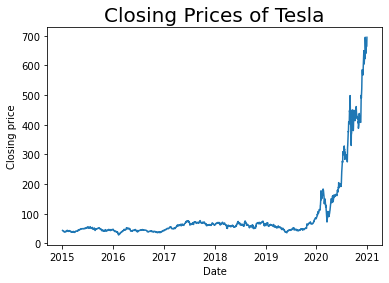

In [701]:

plt.title("Closing Prices of Tesla",fontsize=20)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.plot(df['Close'])
plt.show()

# Compare with rolling statistics

In [702]:
#Mean Stock price on a window of 365 days 
df["rolling_avg"] = df["Close"].rolling(window=365).mean()

#Standard Deviation of stock price on 365 days wimdow
df["rolling_std"] = df["Close"].rolling(window=365).std()

In [703]:
df=df.reset_index()

<AxesSubplot:title={'center':'Trend over the years Compared with yearly moving averages'}, xlabel='Date', ylabel='Close'>

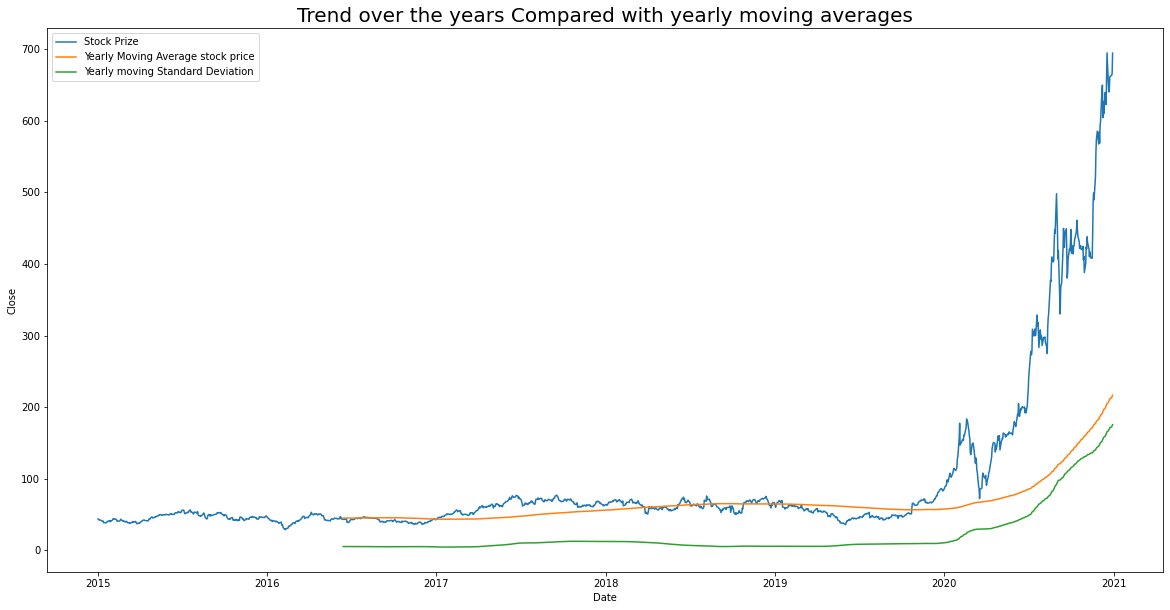

In [704]:
plt.figure(figsize=(20,10))
plt.title('Trend over the years Compared with yearly moving averages',size=20)
sns.lineplot(data=df, x='Date',y='Close',label='Stock Prize ')
sns.lineplot(data=df,x='Date',y='rolling_avg',label='Yearly Moving Average stock price')
sns.lineplot(data=df,x='Date',y='rolling_std',label='Yearly moving Standard Deviation')

# Augmented Dickey–Fuller Test 

Checking for non-stationarity

Null Hypothesis: The data is not stationary.

Alternative Hypothesis:The data is stationary.

In [705]:
from statsmodels.tsa.stattools import adfuller,kpss

In [706]:
dftest = adfuller(df['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                    6.314977
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64


### Based on such high P values, we fail to reject the Null so the data is not Stationary

#  Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
Here the null hypothesis  is that the series is stationary

**Null Hypothesis:** The data is stationary<br>
**Alternate Hypothesis:**: The data is not stationary

In [707]:
statistic, p_value, n_lags, critical_values = kpss(df['Close'])

In [708]:
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

KPSS Statistic: 2.342020314039496
p-value: 0.01
num lags: 24
Critial Values:


### Based on a lower p value, we reject the null , the data is non stationary


# Box Cox Transformation
For making variance constant

In [709]:
from scipy import stats

In [710]:
Boxcox=list(stats.boxcox(df['Close'])[0])

In [711]:
transformed_data, best_lambda = stats.boxcox(df['Close'])
best_lambda

-1.3625118729824754

In [712]:
logged=np.log(df['Close'])
df.insert(len(df.columns), 'logged values',logged)

In [713]:
df.insert(len(df.columns), 'Boxcox',transformed_data)

In [714]:
df_copy=df.copy()

## Plot the values after Box Cox Transformation

<AxesSubplot:xlabel='Date', ylabel='Boxcox'>

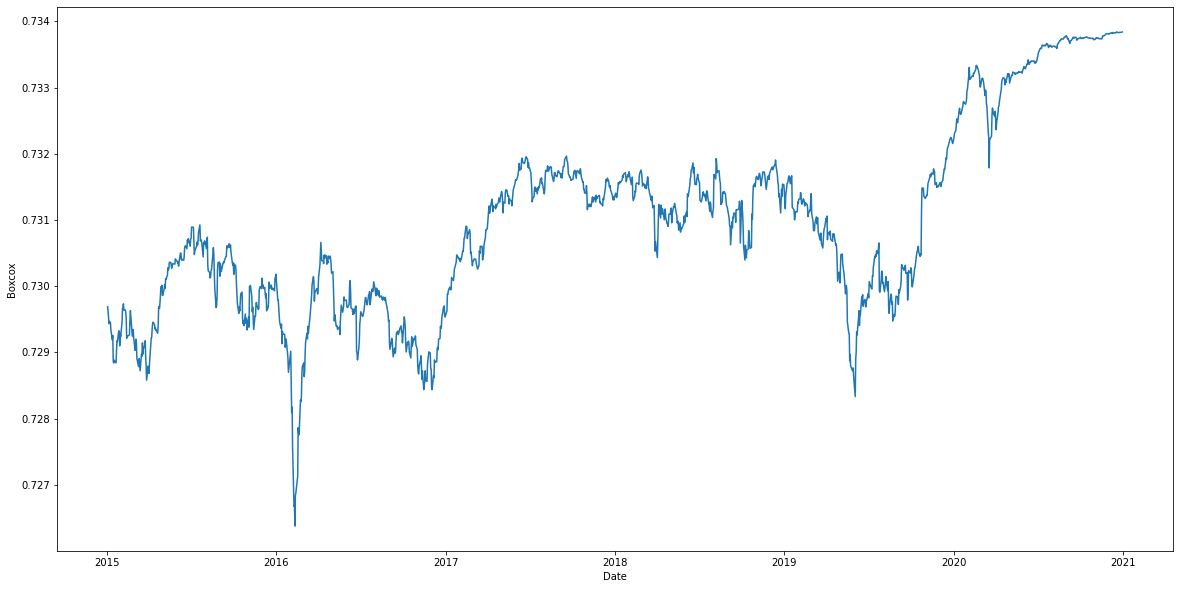

In [715]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Date',y='Boxcox')

# Augemented Dicky Fuller Test to check if the data is stationary for box-cox transformed values

**Null Hypothesis:** The data is not stationary.

**Alternative Hypothesis:** The data is stationary.

In [716]:
test= adfuller(df['Boxcox'], autolag='AIC')

output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test[4].items():
    output['Critical Value (%s)'%key] = value
    
print(output)

Test Statistic                   -1.285773
p-value                           0.635656
#Lags Used                        0.000000
Number of Observations Used    1509.000000
Critical Value (1%)              -3.434691
Critical Value (5%)              -2.863457
Critical Value (10%)             -2.567791
dtype: float64


### Based on the high p values, we Fail to reject the Null ,data is not stationary

# Autocorrelation
### Since the Mean of data is non Stationary,  calculating the first difference of data, the 3rd difference and the 6th difference

Calculating values of AutoCorrelation, a measure of how correlated time series data is at a given point in time with past values

### First lag autocorrelation

In [717]:
autocorrelation_lag1=df['Close'].autocorr(lag=30) ## lag taken for 30 days
print("1 month Lag:", autocorrelation_lag1)

1 month Lag: 0.9624867552011044


### Second lag autocorrelation value of Data: 0.9601946480498523

In [718]:
autocorrelation_lag2=df['Close'].autocorr(lag=60) ## lag taken for 60 days
print("2 month Lag:", autocorrelation_lag2)

2 month Lag: 0.9456946549894001


### Third lag autocorrelation value of Data: 0.8956753113926396

In [719]:
autocorrelation_lag3=df['Close'].autocorr(lag=120) ## lag taken for 120 days
print(" 3 month lag:", autocorrelation_lag3)

 3 month lag: 0.8959107176901502


### Inference : even after giving lag of 3 months the data is highly correlated

# ACF/PACF Plots for closing price value

<Figure size 2160x720 with 0 Axes>

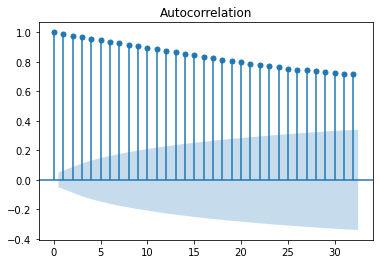

In [720]:
from statsmodels.graphics.tsaplots import plot_acf
fig1=plt.figure(figsize=(30,10))
fig1=plot_acf(df['Close'])

<Figure size 2160x720 with 0 Axes>

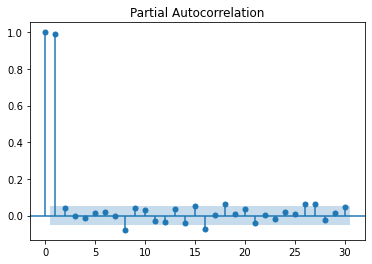

In [721]:
from statsmodels.graphics.tsaplots import plot_pacf
fig=plt.figure(figsize=(30,10))
fig=plot_pacf(df['Close'],lags=30)

### From ACF and PACF plots it looks like AR of 2nd order

# ACF PACF plot using 1st Lag-(1 month lag approx 30 days)

<Figure size 2160x720 with 0 Axes>

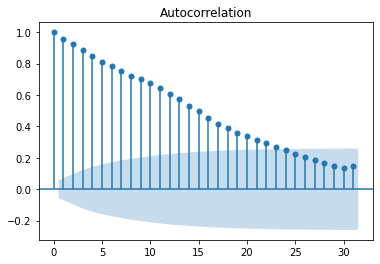

In [722]:
df['lagprice'] = df['Close'].shift(30)
df['1st Differencing']=df['lagprice']-df['Close']
df.dropna(inplace=True)
fig4=plt.figure(figsize=(30,10))
fig4=plot_acf(df['1st Differencing'])

<Figure size 2160x720 with 0 Axes>

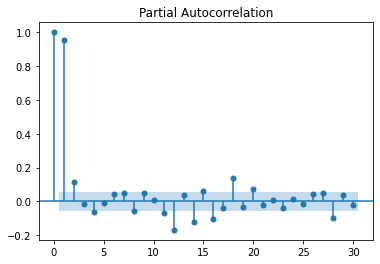

In [723]:
fig=plt.figure(figsize=(30,10))
fig=plot_pacf(df['1st Differencing'],lags=30)

# ACF PACF plot using 2nd Lag

<Figure size 2160x720 with 0 Axes>

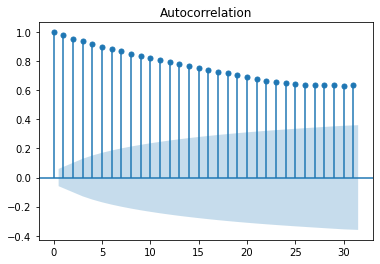

In [724]:
df['lagprice'] = df['Close'].shift(60)
df['1st Differencing']=df['lagprice']-df['Close']
df.dropna(inplace=True)
fig4=plt.figure(figsize=(30,10))
fig4=plot_acf(df['1st Differencing'])

<Figure size 2160x720 with 0 Axes>

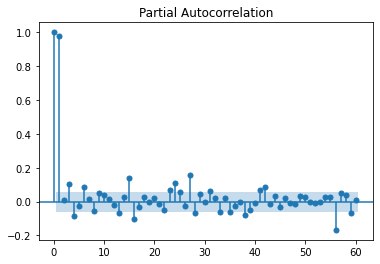

In [725]:
fig=plt.figure(figsize=(30,10))
fig=plot_pacf(df['1st Differencing'],lags=60)

# ACF PACF plot using 3rd Lag- approx 3 months

<Figure size 2160x720 with 0 Axes>

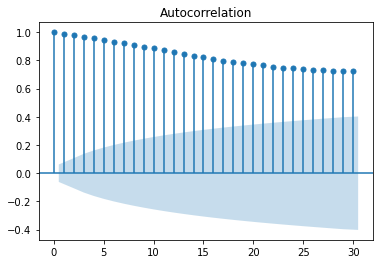

In [726]:
df['lagprice'] = df['Close'].shift(90)
df['1st Differencing']=df['lagprice']-df['Close']
df.dropna(inplace=True)
fig4=plt.figure(figsize=(30,10))
fig4=plot_acf(df['1st Differencing'])

<Figure size 2160x720 with 0 Axes>

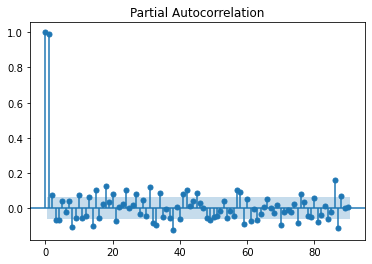

In [727]:
fig=plt.figure(figsize=(30,10))
fig=plot_pacf(df['1st Differencing'],lags=90)

In [728]:
dftest1 = adfuller(df['1st Differencing'], autolag='AIC')

dfoutput = pd.Series(dftest1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                   0.235194
p-value                          0.974168
#Lags Used                      19.000000
Number of Observations Used    976.000000
Critical Value (1%)             -3.434758
Critical Value (5%)             -2.863487
Critical Value (10%)            -2.567807
dtype: float64


***
###  Inference: Even after taking a lag of 3 months , the p value is high and is greater than 0.05 so the data is not stationary
***


## ACF PACF plots for Lagged differencing on BoxCox transformed Values

<Figure size 2160x720 with 0 Axes>

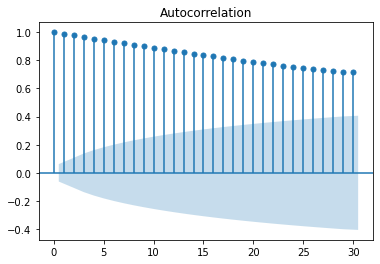

In [729]:
df['lagprice'] = df['Boxcox'].shift(3)
df['3rd lag Differencing']=df['lagprice']-df['Close']
df.dropna(inplace=True)
fig4=plt.figure(figsize=(30,10))
fig4=plot_acf(df['3rd lag Differencing'])

<Figure size 2160x720 with 0 Axes>

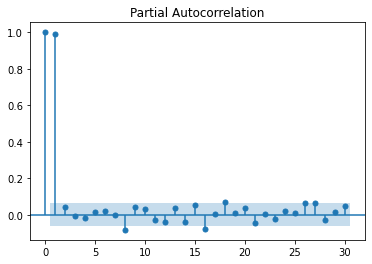

In [730]:
fig5=plt.figure(figsize=(30,10))
fig5=plot_pacf(df['3rd lag Differencing'],lags=30)

## from the ACF and PACF plots it looks like AR of 2nd order

# Trend Decomposition


In [731]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [732]:
decompose=seasonal_decompose(df['Close'],model='multiplicative',period=365) ## period is 365 to see yearly trend

<Figure size 2160x1440 with 0 Axes>

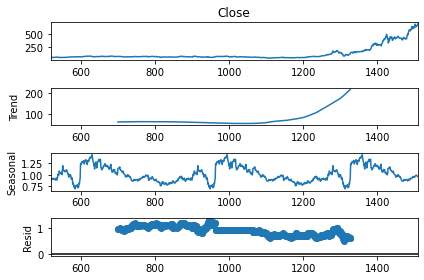

In [733]:
fig3=plt.figure(figsize=(30,20))
fig3=decompose.plot()

### Inference:  Yes, there are seasonal fluctuations in the data as can be seen from the seasonal spikes in the figure above but overall there is no seasonality since there is a high spike at the end

# Section 2

# Fitting Several Arima Models and the using Auto Arima to obtain the best model

In [734]:
import pmdarima
from pmdarima.arima import auto_arima

In [735]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [736]:
model1=ARIMA(df_copy['Boxcox'],order=(2,0,1))
model1 = model1.fit()
model1.summary()
print(model1.bic)

-15497.180506688877


In [737]:
model2=ARIMA(df_copy['Boxcox'],order=(1,1,1))
model2 = model2.fit()
model2.summary()
print(model2.bic)

-22753.742733672225


In [738]:
model3=ARIMA(df_copy['Boxcox'],order=(2,1,3))
model3 = model3.fit()
model3.summary()
print(model3.bic)

-22731.962556627073


### Based on the above findings, we select the ARIMA(1,1,1) model as it has the least AIC and BIC

In [739]:
model_best=ARIMA(df_copy['Boxcox'],order=(1,1,1))

<AxesSubplot:>

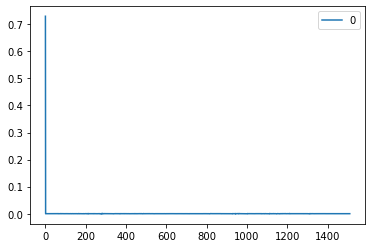

In [740]:
model_fit_best = model_best.fit()
residuals_best = pd.DataFrame(model_fit_best.resid)
residuals_best.plot()


In [741]:
residuals_best.describe()

,0
count,1510.000000
mean,0.000486
std,0.018778
min,-0.000858
25%,-0.000045
50%,0.000002
75%,0.000060
max,0.729689


# Auto Arima to find the best fit model 

In [742]:
import pmdarima as pm

In [743]:
model_autoarima = pm.auto_arima(df_copy['Boxcox'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=5,              # frequency of series
                      d=None,           # let model determine 'd'
                        
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-22769.073, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-22770.545, Time=0.74 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-22767.703, Time=1.06 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-22767.648, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-22771.844, Time=0.11 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-22769.058, Time=0.87 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-22767.284, Time=1.63 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-22769.267, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-22769.208, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-22768.237, Time=2.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 11.412 seconds


In [744]:
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1510
Model:               SARIMAX(0, 1, 0)   Log Likelihood               11386.922
Date:                Sat, 05 Feb 2022   AIC                         -22771.844
Time:                        17:26:06   BIC                         -22766.525
Sample:                             0   HQIC                        -22769.863
                               - 1510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.633e-08   2.89e-10     56.537      0.000    1.58e-08    1.69e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):              2738.83
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Ljung-Box test for residuals

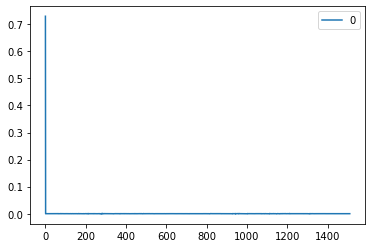

In [745]:
# line plot of residuals
model=ARIMA(df['Boxcox'],order=(0,1,0))
residuals = pd.DataFrame(model_fit_best.resid)
residuals.plot()
plt.show()

### H0: The residuals are independently distributed.

### HA: The residuals are not independently distributed; they exhibit serial correlation.

In [746]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)


,lb_stat,lb_pvalue
5,0.000238,1.0


### Inference : We cannot reject null hypothesis which means residuals are independently distributed

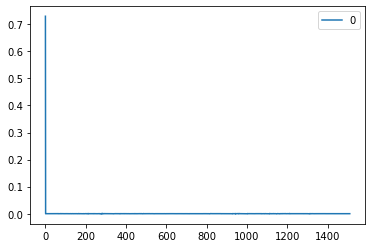

In [747]:
# line plot of residuals
model=ARIMA(df_copy['Boxcox'],order=(0,1,0))
residuals = pd.DataFrame(model_fit_best.resid)
residuals.plot()
plt.show()

In [761]:
from scipy.special import boxcox, inv_boxcox
prediction1=model_fit_best.predict(start=0, end=1509)
pred1=inv_boxcox(prediction1,-1.36)

In [762]:
prediction=model_fit_best.predict(start=0, end=1509)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_copy['Close'],pred1))

106.5792299366475

<Figure size 2160x720 with 0 Axes>

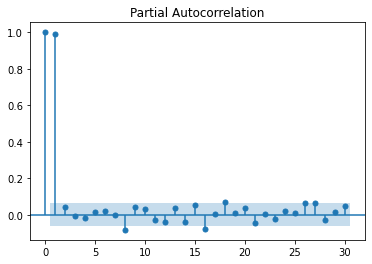

In [763]:
from statsmodels.graphics.tsaplots import plot_pacf
fig=plt.figure(figsize=(30,10))
fig=plot_pacf(df['Close'],lags=30)

### ACF PACF plots for residual

<Figure size 2160x720 with 0 Axes>

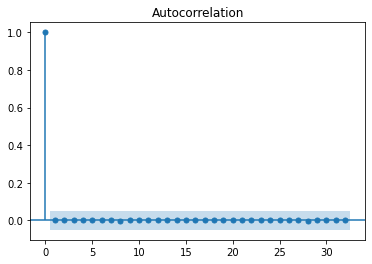

In [764]:
fig4=plt.figure(figsize=(30,10))
fig4=plot_acf(residuals)

<Figure size 2160x720 with 0 Axes>

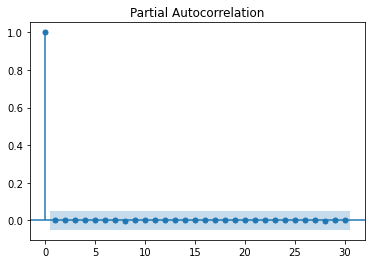

In [765]:
fig5=plt.figure(figsize=(30,10))
fig5=plot_pacf(residuals,lags=30)

# From ACF PACF figures, it can be inferred that there is no autocorrelation in the residuals and it is a white noise process

## RMSE value is 106.58


### Predicted values for the next 5 periods

In [766]:

prediction2=model_fit_best.predict(start=1510, end=1514)
pred2=inv_boxcox(prediction2, -1.362)

In [767]:
pred2

1510    261.541310
1511    261.583308
1512    261.606839
1513    261.620021
1514    261.627405
Name: predicted_mean, dtype: float64

# The Predicted values are reasonable and comparable to the original values

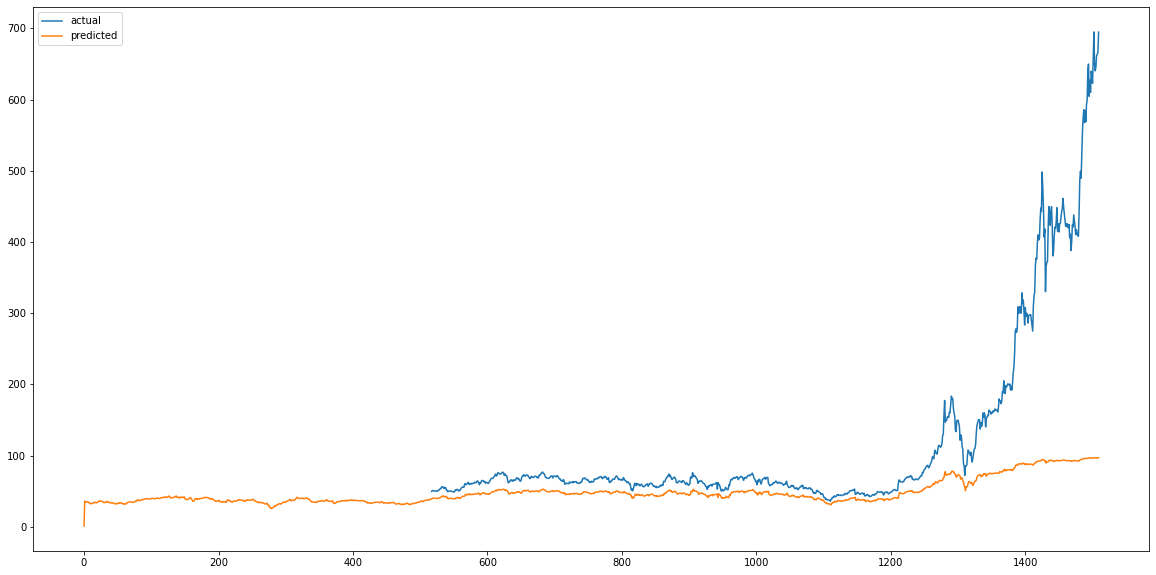

In [768]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'],label='actual')
plt.plot(pred1,label='predicted')
plt.legend()

# Yes in sample predicted values follow approximately the same trend as the original data